In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from FFNN.Model import FFNN
import numpy as np
import matplotlib.pyplot as plt

In [24]:
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[0], [1], [1], [0]]) 

ffnn = FFNN(
        layers=[2, 2, 2, 1], 
        activations=["relu", "relu", "sigmoid"], 
        loss="binary_cross_entropy",
        init_method="uniform", lower=-0.5, upper=0.5, seed=42,
        l1_lambda=0.00001,
        l2_lambda=0.0003,
    )

loss = ffnn.train(X_train, y_train, epochs=5000, lr=0.1, batch_size=2, verbose=1)

y_pred = ffnn.predict(X_train)
print(y_pred)

Epoch 500/5000, Loss: 0.011330776375615513
Epoch 1000/5000, Loss: 0.0020483923580883676
Epoch 1500/5000, Loss: 0.0012328769468610157
Epoch 2000/5000, Loss: 0.0009657520481230503
Epoch 2500/5000, Loss: 0.0008471204611616385
Epoch 3000/5000, Loss: 0.0007850628535355394
Epoch 3500/5000, Loss: 0.0007484512714990333
Epoch 4000/5000, Loss: 0.0007274444581288323
Epoch 4500/5000, Loss: 0.0007144424242393374
Epoch 5000/5000, Loss: 0.0007056607901476948
[[0]
 [1]
 [1]
 [0]]


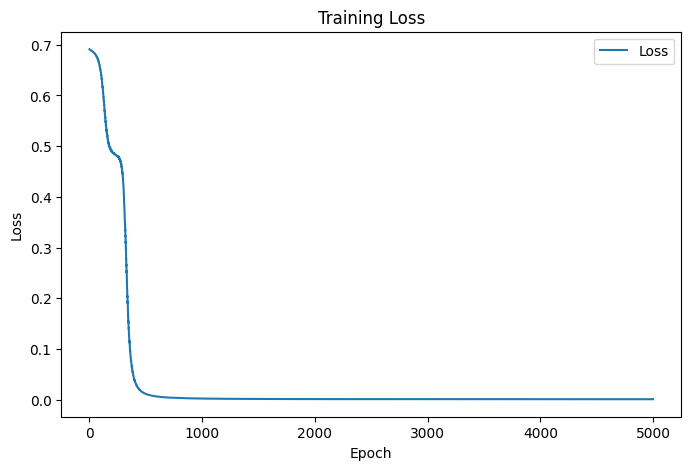

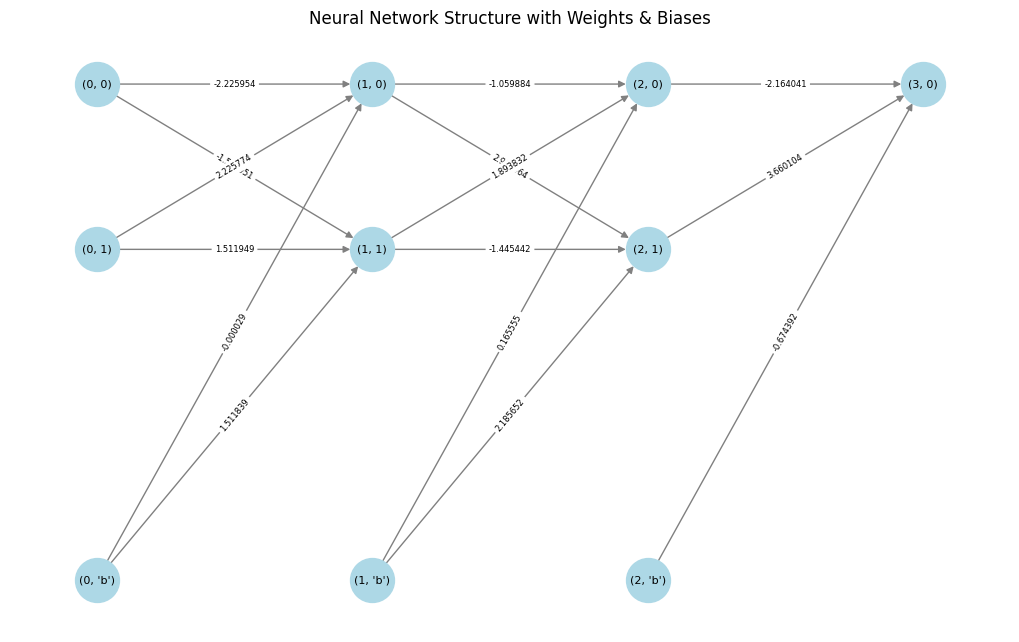

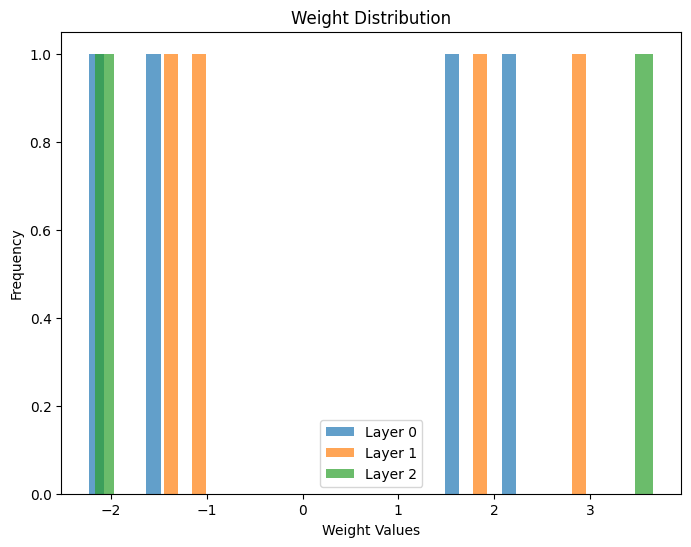

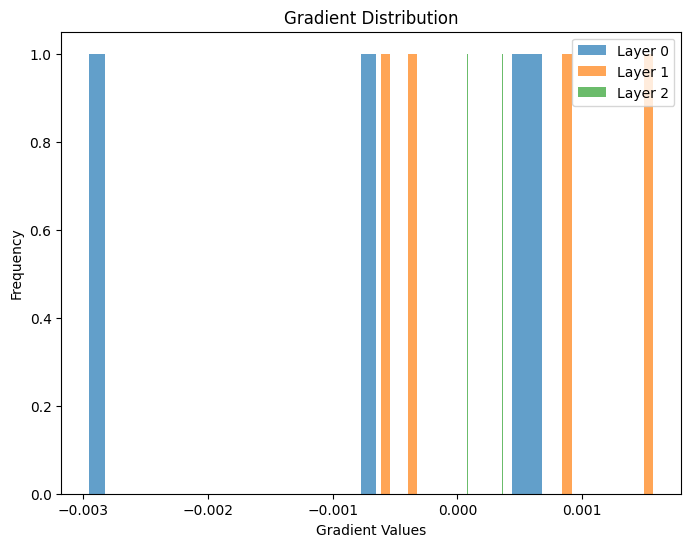

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(loss, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.show()

ffnn.visualize_network()

ffnn.plot_weight_distribution([0, 1, 2])

ffnn.plot_gradient_distribution([0, 1, 2])

In [26]:
# Generate random dataset
num_samples = 10000
num_features = 10
num_classes = 2

X = np.random.randn(num_samples, num_features)
y = np.random.randint(0, num_classes, size=(num_samples,))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

encoder = OneHotEncoder(sparse_output=False) 
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

In [28]:
output_size = y_train_encoded.shape[1]
layers = [X_train.shape[1], 4, 4, output_size]
activations = ['relu', 'relu', 'softmax']
loss = 'categorical_cross_entropy'

model = FFNN(layers, 
             activations, 
             loss, 
            #  l1_lambda=0.000001,
            #  l2_lambda=0.00001,
            #  rms_norm=True,
             init_method="uniform", 
             seed=42)
history = model.train(X_train, y_train_encoded, epochs=1000, lr=0.1, batch_size=100)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Epoch 100/1000, Loss: 0.6897709357309068
Epoch 200/1000, Loss: 0.6886207968814608
Epoch 300/1000, Loss: 0.6874630919085248
Epoch 400/1000, Loss: 0.6867108784550194
Epoch 500/1000, Loss: 0.6866493759245772
Epoch 600/1000, Loss: 0.6866332432993936
Epoch 700/1000, Loss: 0.6866256933040513
Epoch 800/1000, Loss: 0.6866237197988971
Epoch 900/1000, Loss: 0.6866128909916938
Epoch 1000/1000, Loss: 0.6866007446313562
Accuracy: 0.5230


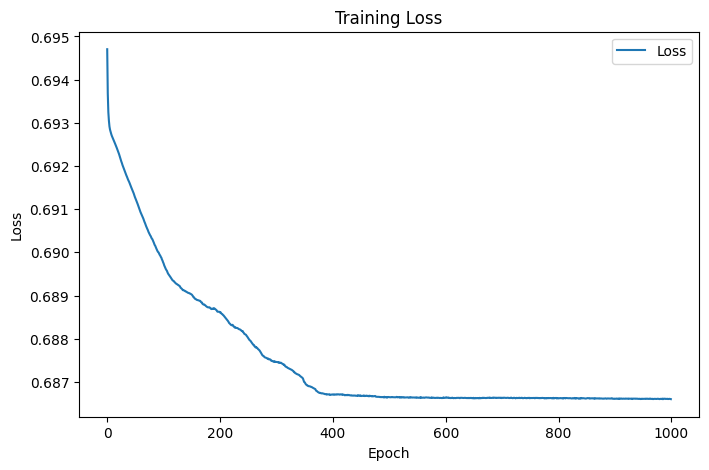

In [29]:
plt.figure(figsize=(8, 5))
plt.plot(history, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.show()

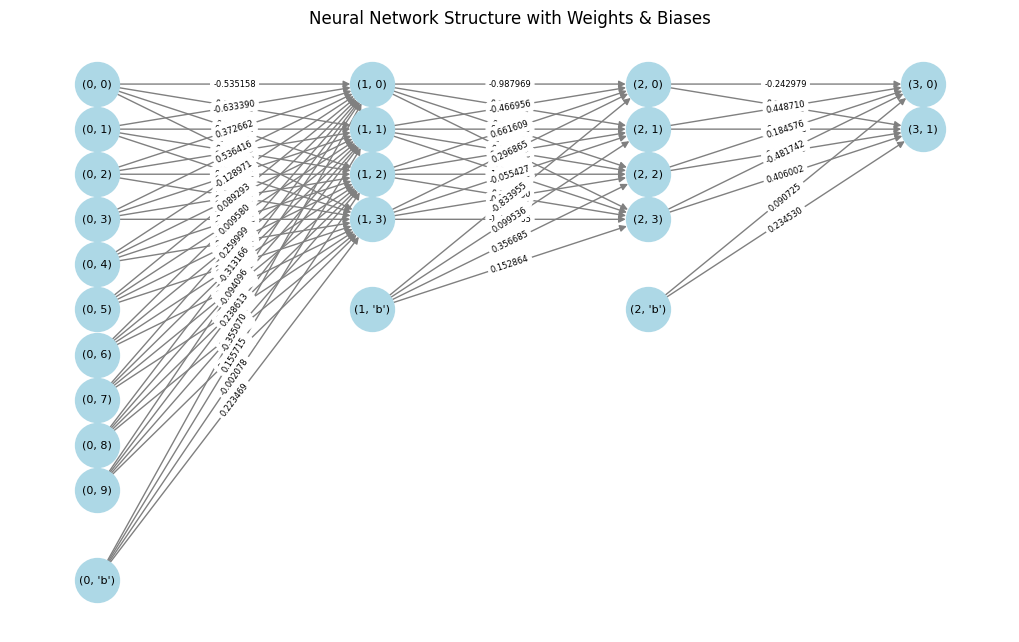

In [30]:
model.visualize_network()

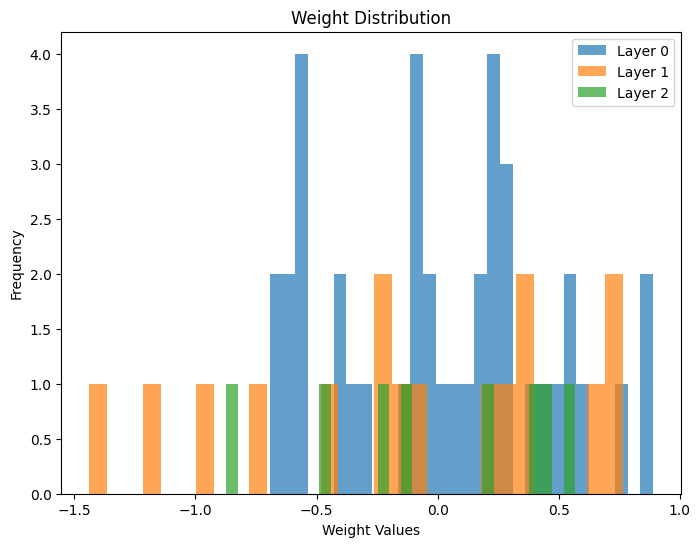

In [31]:
model.plot_weight_distribution([0, 1, 2])

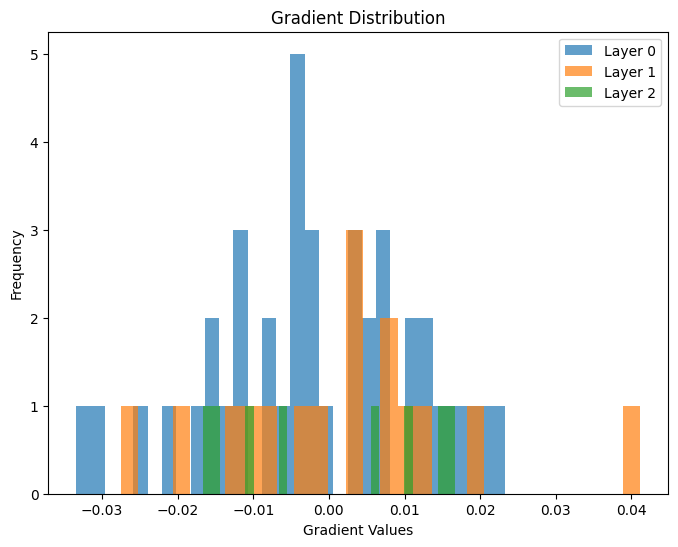

In [32]:
model.plot_gradient_distribution([0, 1, 2])